# Boom Bike


### Step 1: Importing and Understanding Data

In [88]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [90]:
# Importing day.csv
bike=pd.read_csv('day.csv')

In [91]:
# Looking at the first five rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [92]:
bike.shape

(730, 16)

In [93]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [94]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [95]:
bike.isnull().sum()
#Using both the info() method and the isnull().sum() method, we determined that there are no null values in the dataset.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Assigning the categorical variables by refering Data dictionary for EDA

In [98]:
bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['yr']=bike['yr'].map({0: '2018', 1:'2019'})
bike['holiday']=bike['holiday'].map({0: 'No', 1: 'Yes'})
bike['weekday'] = bike['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
bike['workingday'] = bike['workingday'].map({0: 'No', 1: 'Yes'})
bike['weathersit']=bike['weathersit'].map({
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy", 
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"})

In [99]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,No,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,No,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Removing the columns that are unnecessary and unhelpful for analysis.

In [102]:
bike=bike.drop(columns=['casual','registered','instant'])

In [103]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,No,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,No,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the Data

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

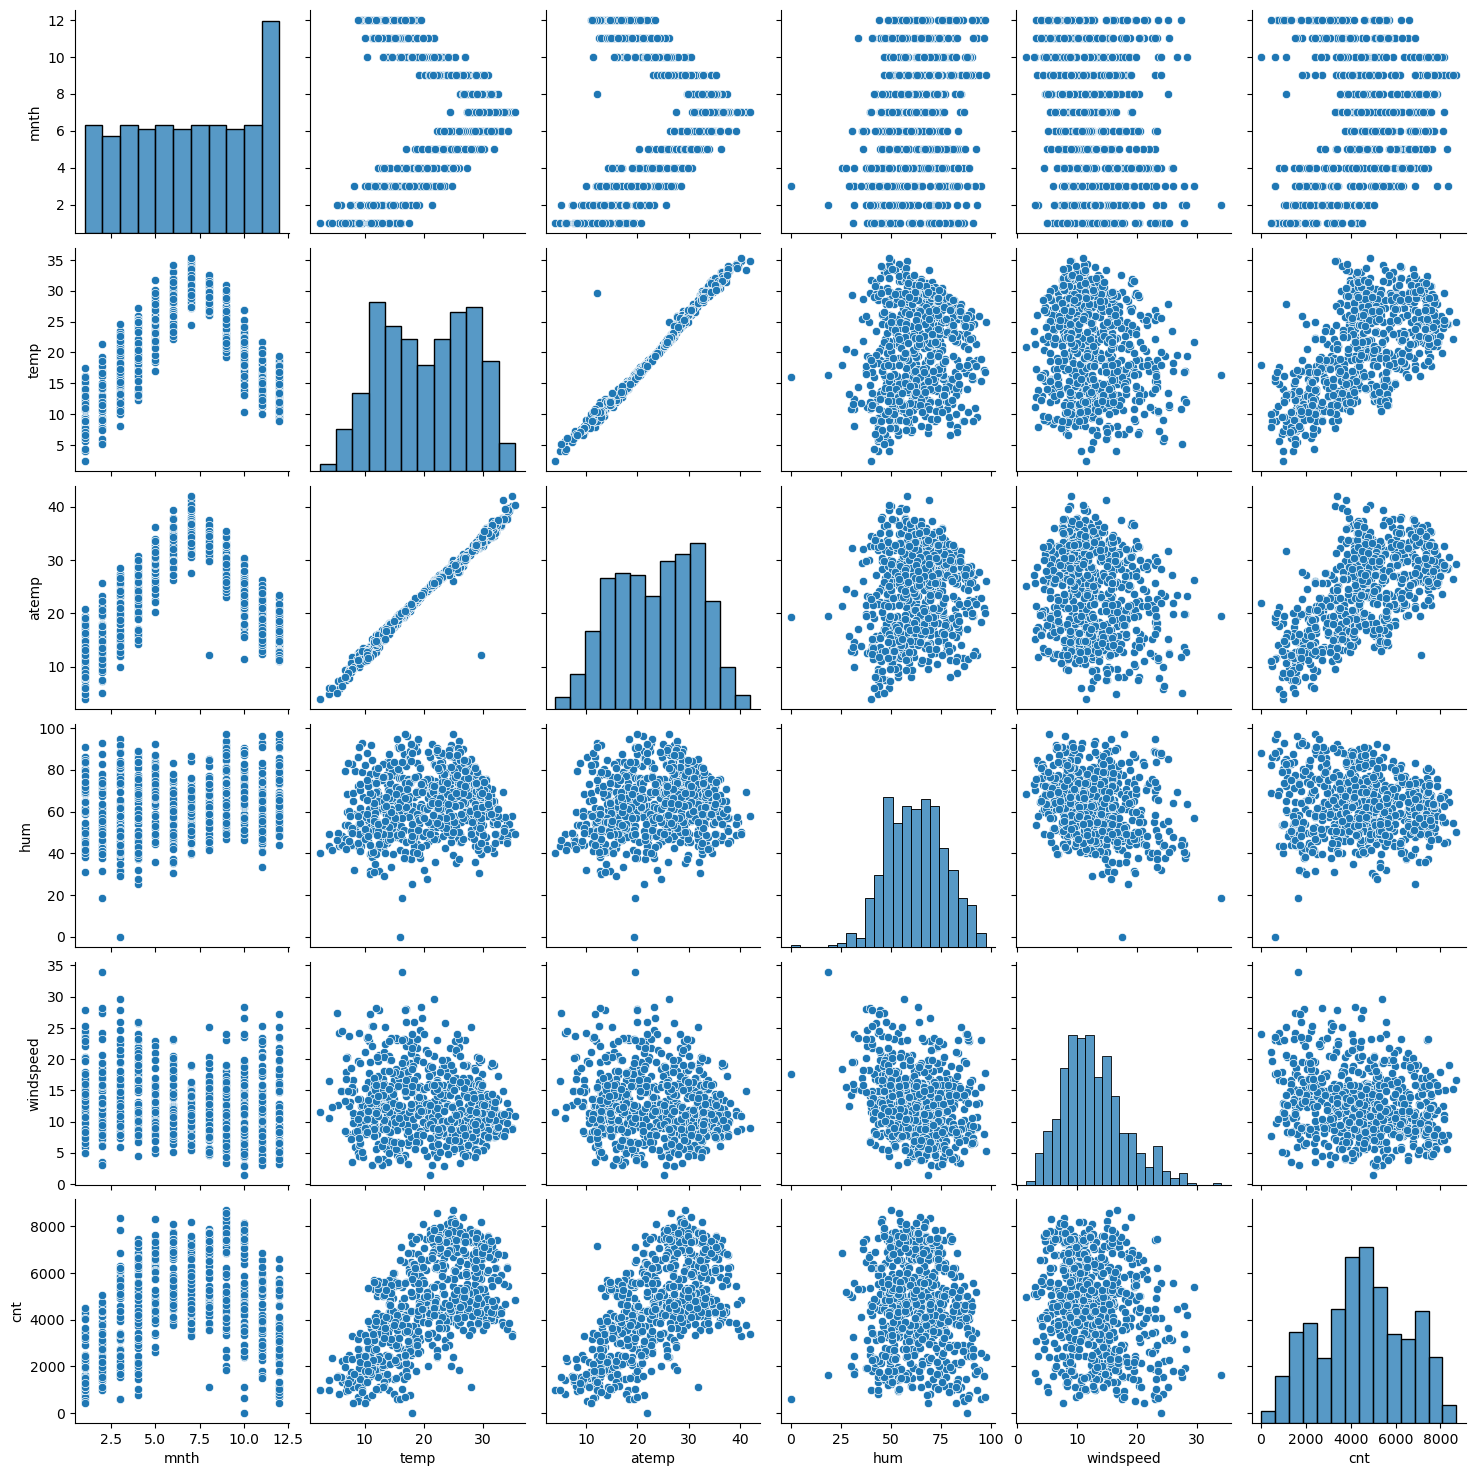

In [108]:
num_data=bike.select_dtypes(include=['float64','int64'])
sns.pairplot(num_data)
plt.show()

#### Checking the correation between the variables

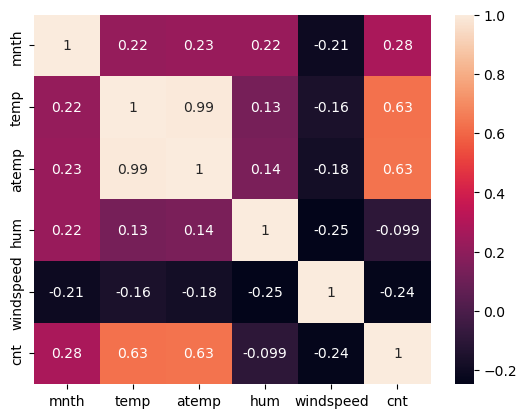

In [110]:
sns.heatmap(num_data.corr(),annot=True)
plt.show()

#### <span style="color: blue;">Inference: </span>
1)From the above two plots, we observe that among the numerical variables, the temperature variable exhibits a slightly stronger positive correlation with the target variable 'cnt' compared to the others.

2)From the above observations, we see that both the 'atemp' and 'temp' variables are highly correlated, causing multicollinearity. Given that 'atemp' represents the actual temperature and 'temp' represents the temperature, we can drop one of these two variables to avoid redundancy.

#### Based on the above inference, we are dropping one column. Since the 'temp' variable likely represents the raw temperature and may not reflect conditions as accurately as 'atemp', we are dropping the 'temp' variable.

In [123]:
bike=bike.drop('temp',axis=1)

In [124]:
bike .head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,No,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,No,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",11.46350,43.6957,12.522300,1600


#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables considering "cnt" as a target variable

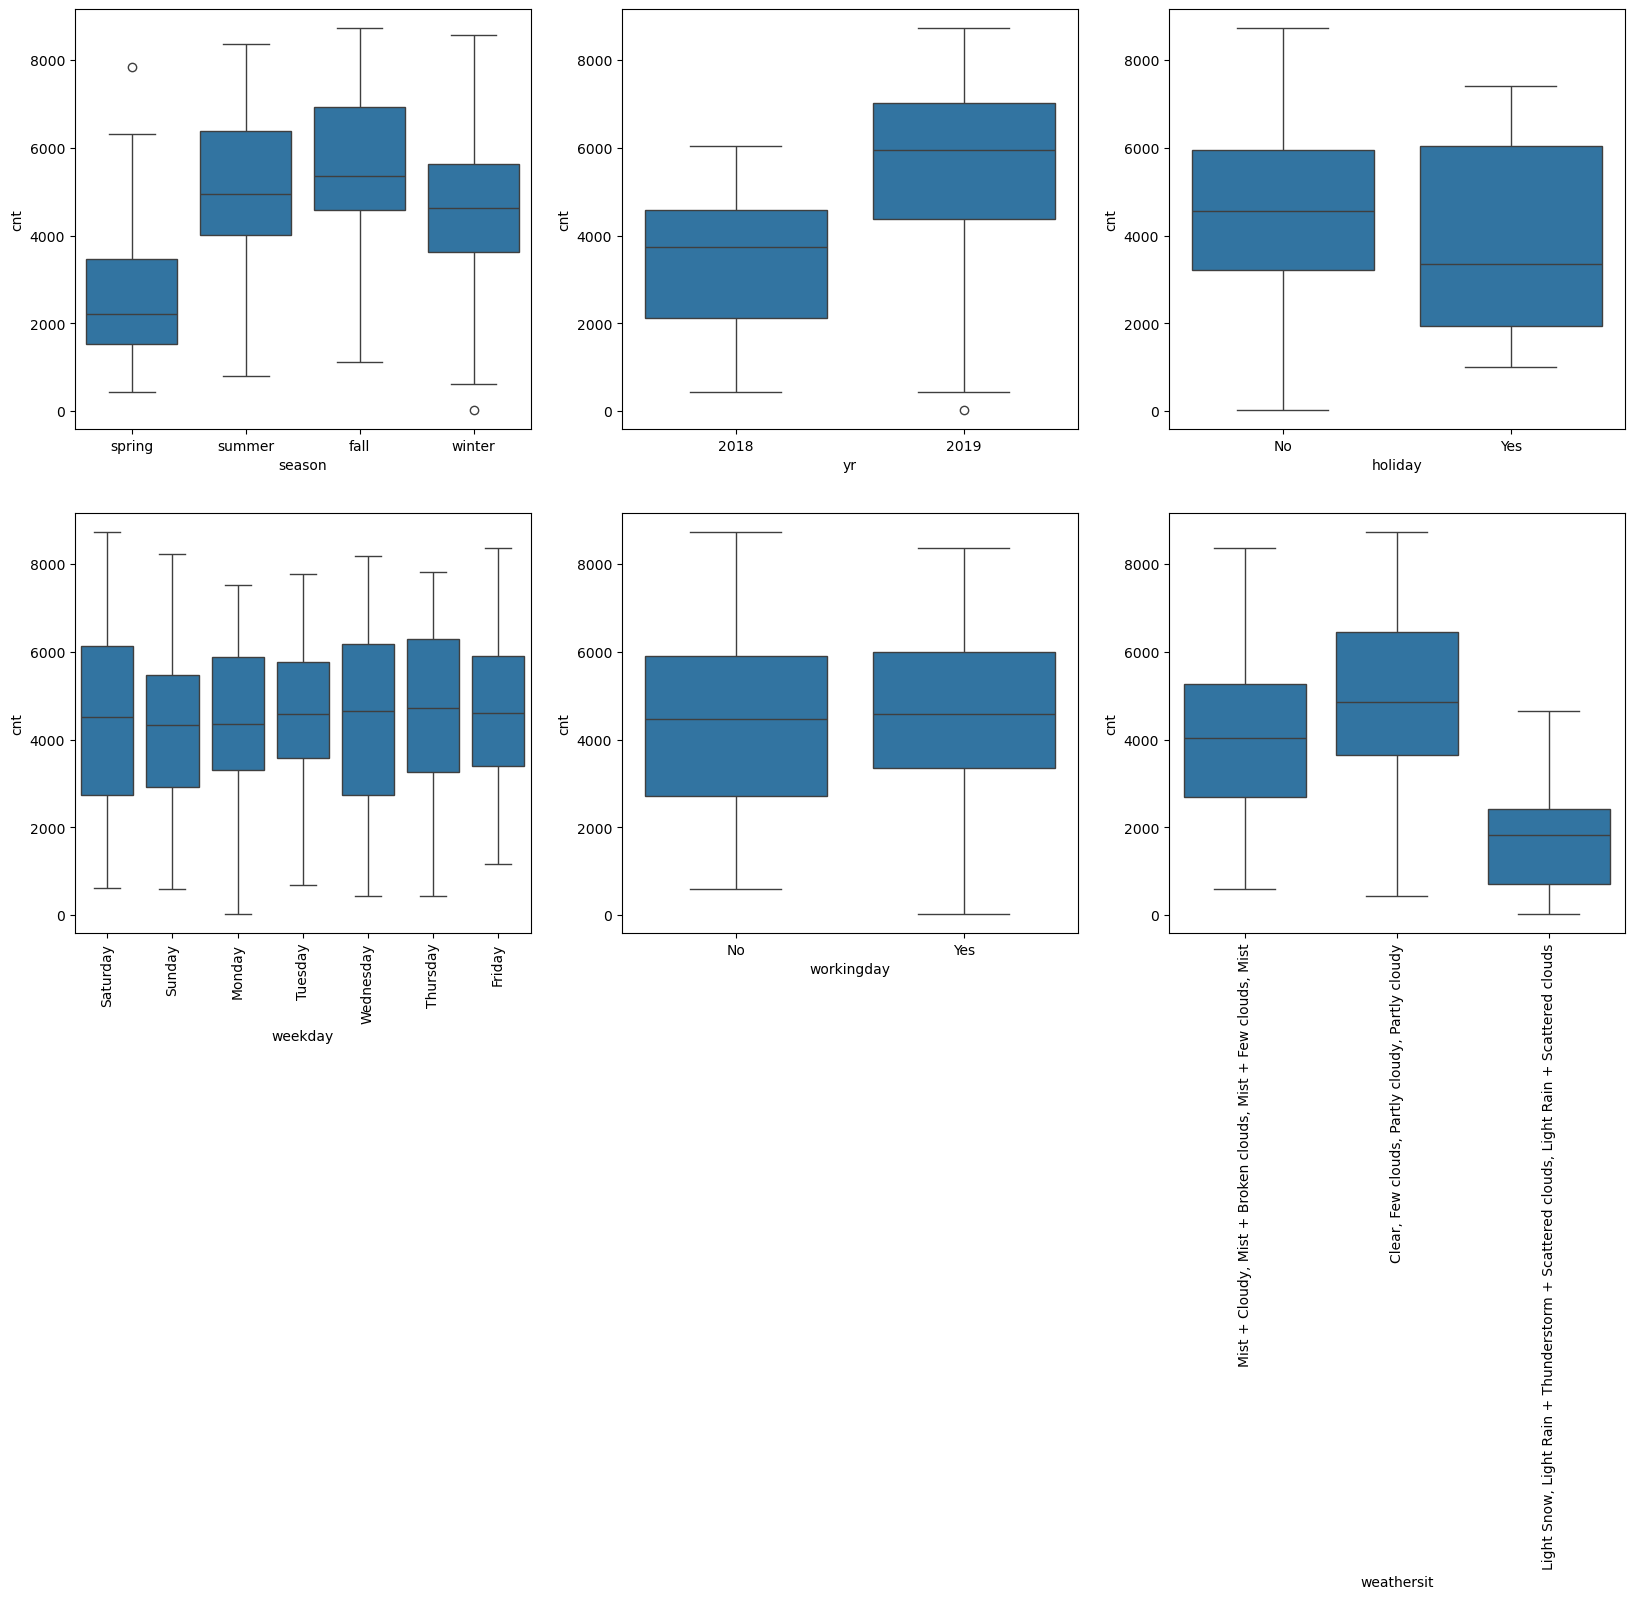

In [128]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.xticks(rotation=90)
plt.show()

#### <span style="color: blue;"> Inferences </span>
1)From the above subplots, we observe that for the variable 'Season,' people are more likely to opt for bike sharing during the Summer, Fall, and Winter seasons compared to the Spring season.

2)From the above subplots, we observe that for the variable 'yr,' 2019 shows the highest usage compared to 2018.

3)From the above subplots, we observe that for the variable 'weathersit,' people tend to use the boom bikes slightly more during weather conditions such as mist, cloudy skies, and clear skies compared to light rain, light snow, and thunderstorms.

## Data Preparation

- You can see that your dataset has two column with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [136]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01-01-2018,spring,2018,1,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",18.18125,80.5833,10.749882,985
1,02-01-2018,spring,2018,1,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",17.68695,69.6087,16.652113,801
2,03-01-2018,spring,2018,1,No,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,2018,1,No,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,2018,1,No,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",11.46350,43.6957,12.522300,1600


In [137]:
binaryCatVar=['holiday','workingday']

In [138]:
bike[binaryCatVar]=bike[binaryCatVar].apply(lambda x : x.map({'Yes':1 , 'No':0}))

In [139]:
bike['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [140]:
bike['yr']=bike['yr'].map({'2018':0 , '2019':1})

Since the 'mnth' column covers months, the 'weekday' column covers days, and the 'yr' column covers years, we can drop the 'dteday' column. Removing redundant columns simplifies your data and helps avoid potential multicollinearity issues in your regression model.

In [142]:
bike=bike.drop(['dteday'], axis=1)

In [143]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",11.46350,43.6957,12.522300,1600


### Dummy Variables

Few categorical variables having more than two levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [148]:
bike_encoded=pd.get_dummies(bike, columns=['season','weekday','weathersit'], drop_first=True)


In [149]:
bike_encoded.shape

(730, 19)

In [150]:
bike_encoded.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [151]:
dummyColumns=bike_encoded.columns.difference(bike.columns)

In [152]:
bike_encoded[dummyColumns]=bike_encoded[dummyColumns].astype(int)


In [153]:
bike_encoded.head()


,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,0,1,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0,0,1
2,0,1,0,1,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [158]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bike_train, bike_test = train_test_split(bike_encoded, train_size = 0.7, test_size = 0.3, random_state = 100)

In [159]:
bike_train.shape

(510, 19)

In [160]:
bike_test.shape

(219, 19)

### Rescaling the Features 

We will use MinMax scaling.

In [164]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [165]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth','atemp', 'hum', 'windspeed', 'cnt']

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

bike_train.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,0.818182,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,1,0,0,0
576,1,0.545455,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0
426,1,0.181818,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,1
728,1,1.000000,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,1,0,0,0,0,0
482,1,0.272727,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,1


In [166]:
bike_train.describe()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.315338,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


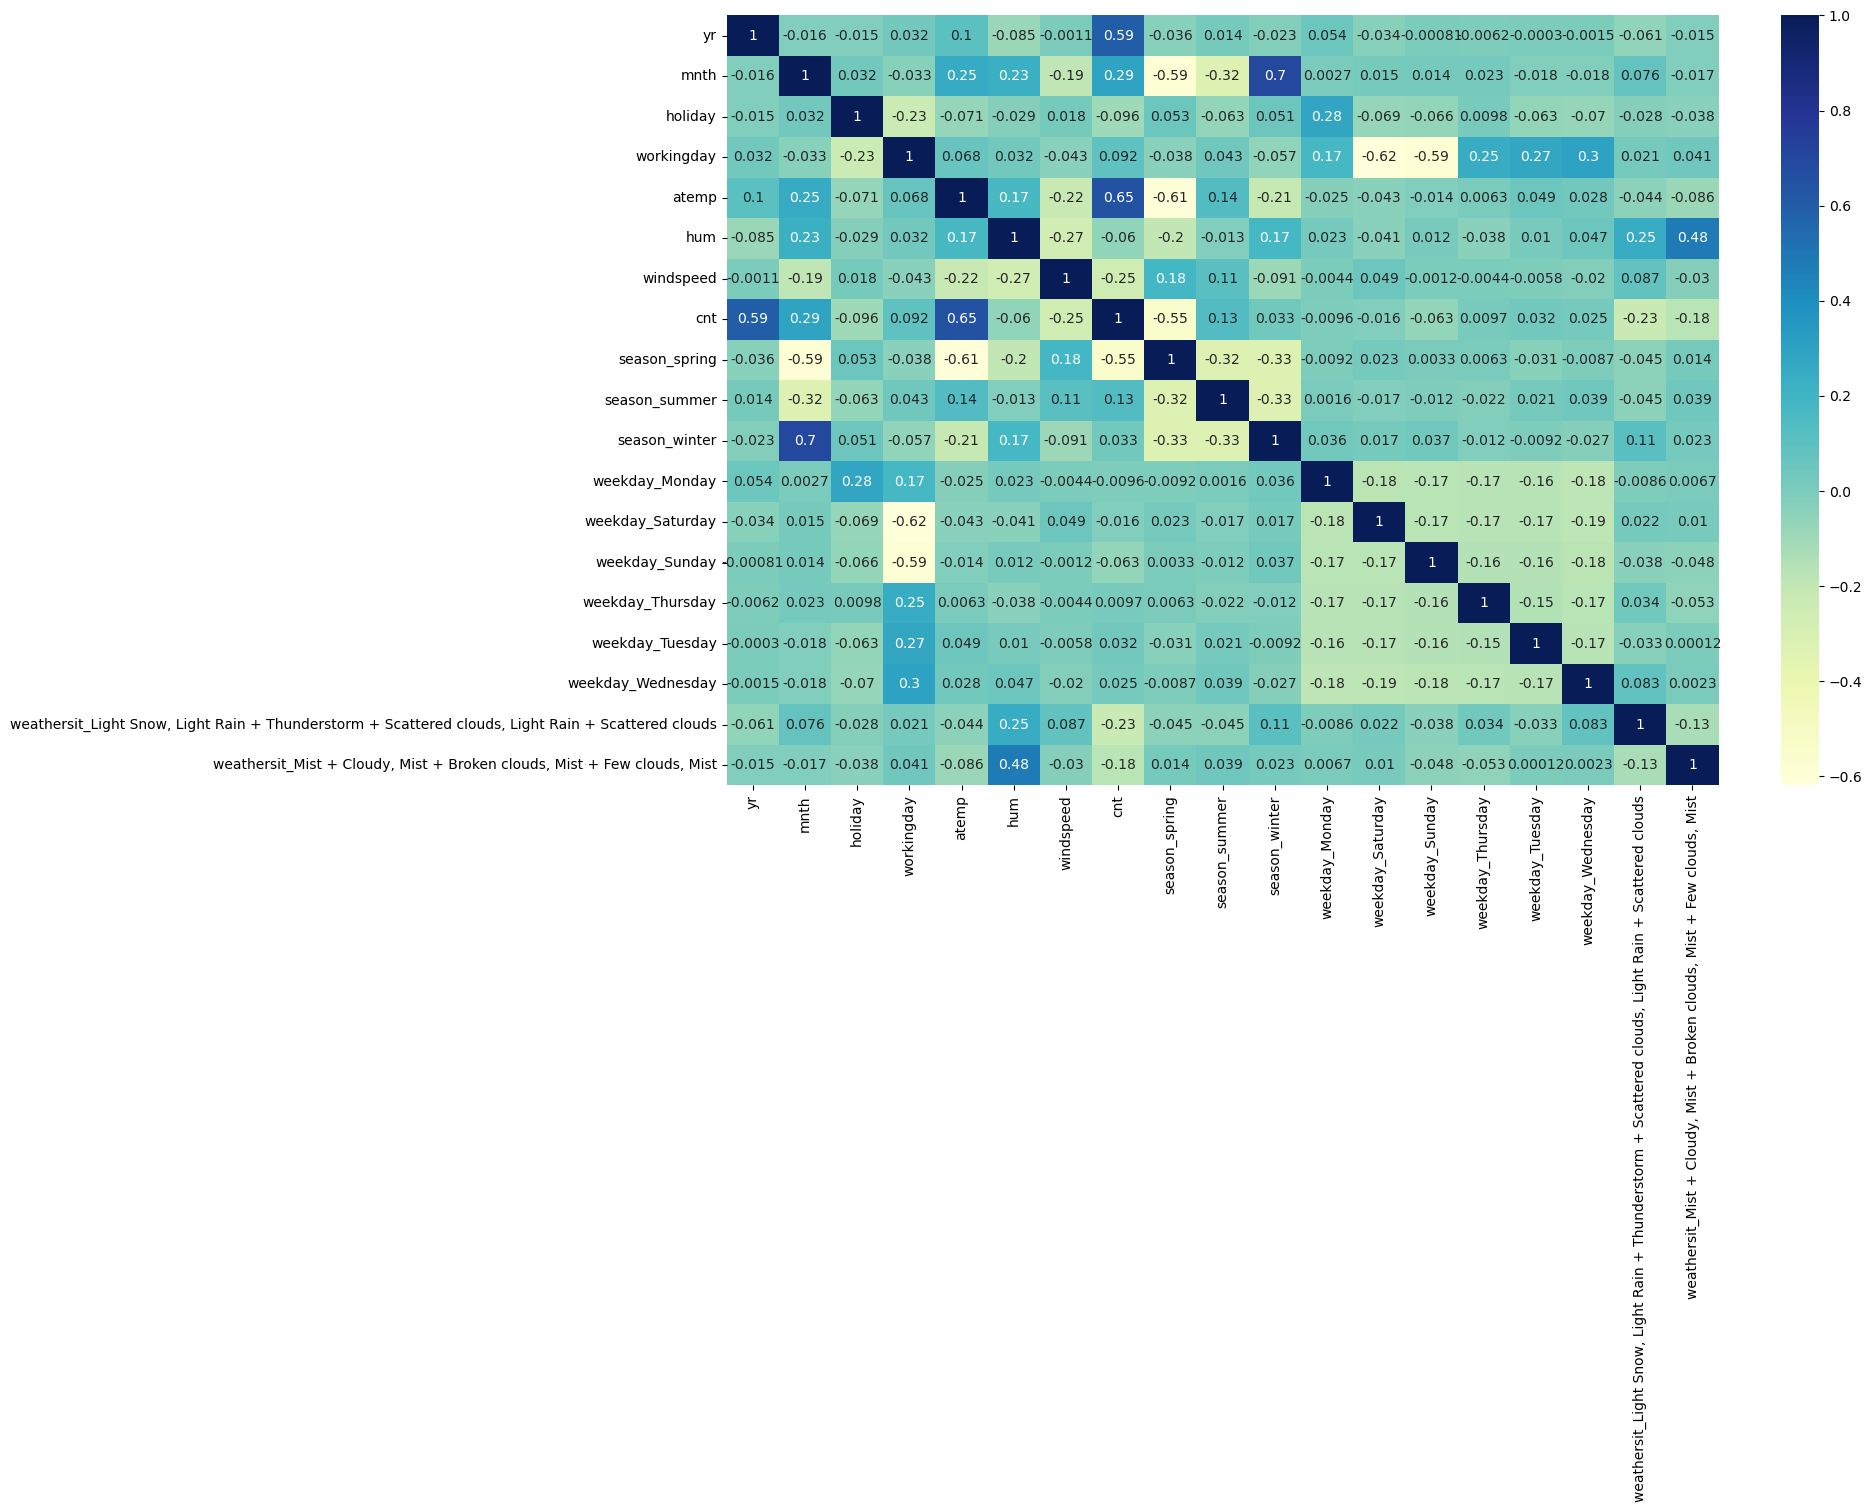

In [169]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### <span style="color: blue;"> Inferences </span>
1)We observe that the variables 'atemp,' 'yr', and 'mnth' are highly correlated with the target variable 'cnt,' in that respective order.

### Dividing into X and Y sets for the model building

In [174]:
y_train = bike_train.pop('cnt')
X_train = bike_train

## Model Building
By considering all the independent variables


In [176]:
import statsmodels.api as sm

X_train_sm=sm.add_constant(X_train)
mlr=sm.OLS(y_train,X_train_sm)

mlr_model=mlr.fit()
mlr_model.params

const                                                                                                 0.223637
yr                                                                                                    0.233371
mnth                                                                                                  0.013768
holiday                                                                                               0.011782
workingday                                                                                            0.092504
atemp                                                                                                 0.491110
hum                                                                                                  -0.124966
windspeed                                                                                            -0.161921
season_spring                                                                                        -0.090160
s

In [177]:
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.35e-177
Time:                        12:47:50   Log-Likelihood:                 491.69
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     492   BIC:                            -871.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

Looking at the p-values, it looks like many of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest non-significant p-value. However, a more efficient approach would be to rebuild the model using an automated Recursive Feature Elimination (RFE) method. This way, we can quickly drop non-significant variables without the need to rebuild and check p-values and VIF values one by one.


### Rebuiding the model - RFE
Recursive feature elimination

In [181]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [182]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [183]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 8),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', False, 5),
 ('season_winter', False, 4),
 ('weekday_Monday', False, 6),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  False,
  3)]

Based on our earlier inferences from the data, we will drop the 'weekday_Wednesday' and 'weekday_Thursday' variables as they have a lower correlation with the target variable 'cnt.'

In [185]:
X_train_rfe=X_train.drop(columns=['weekday_Wednesday','weekday_Thursday'])

In [186]:

y_train.shape

(510,)

### Building model using statsmodel, for the detailed statistics

In [188]:
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()

mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.04e-179
Time:                        12:47:51   Log-Likelihood:                 491.34
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     494   BIC:                            -882.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2213      0.030      7.297      0.000       0.162       0.281
yr                                                                                                     0.2333      0.008     27.574      0.000       0.217       0.250
mnth                                                                                                   0.0132      0.026      0.505      0.614      -0.038       0.064
holiday                                                                                                0.0075      0.024      0.318      0.750      -0.039       0.054
workingday                                                                                             0.0888      0.010      8.457      0.000       0.068       0.109
atemp                                                                                                  0.4910      0.035     13.920      0.000       0.422       0.560
hum                                                                                                   -0.1252      0.039     -3.182      0.002      -0.202      -0.048
windspeed                                                                                             -0.1620      0.027     -6.044      0.000      -0.215      -0.109
season_spring                                                                                         -0.0905      0.022     -4.037      0.000      -0.135      -0.046
season_summer                                                                                          0.0317      0.015      2.081      0.038       0.002       0.062
season_winter                                                                                          0.0659      0.018      3.703      0.000       0.031       0.101
weekday_Monday                                                                                        -0.0211      0.013     -1.631      0.103      -0.047       0.004
weekday_Saturday                                                                                       0.0908      0.013      7.115      0.000       0.066       0.116
weekday_Sunday                                                                                         0.0342      0.013      2.572      0.010       0.008       0.060
weekday_Tuesday                                                                                       -0.0161      0.013     -1.224      0.222      -0.042       0.010
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Ra

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.


In [192]:
X_train_rfe.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Tuesday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)
print(vif)

                                             Features        VIF
3                                          workingday  54.716406
11                                   weekday_Saturday  13.105573
12                                     weekday_Sunday  12.530685
7                                       season_spring   5.357402
1                                                mnth   3.914316
9                                       season_winter   3.430625
4                                               atemp   3.245947
2                                             holiday   3.193034
8                                       season_summer   2.486177
5                                                 hum   1.905179
15  weathersit_Mist + Cloudy, Mist + Broken clouds...   1.579019
14  weathersit_Light Snow, Light Rain + Thundersto...   1.260647
10                                     weekday_Monday   1.242240
6                                           windspeed   1.197937
13                       

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.750`. Let's go ahead and drop this variables

In [196]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['holiday'], axis=1,)

#### Rebuild the model

In [198]:
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()



In [199]:
mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.04e-179
Time:                        12:47:51   Log-Likelihood:                 491.34
No. Observations:                 510   AIC:                            -950.7
Df Residuals:                     494   BIC:                            -882.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2288      0.046      4.922      0.000       0.137       0.320
yr                                                                                                     0.2333      0.008     27.574      0.000       0.217       0.250
mnth                                                                                                   0.0132      0.026      0.505      0.614      -0.038       0.064
workingday                                                                                             0.0813      0.028      2.935      0.003       0.027       0.136
atemp                                                                                                  0.4910      0.035     13.920      0.000       0.422       0.560
hum                                                                                                   -0.1252      0.039     -3.182      0.002      -0.202      -0.048
windspeed                                                                                             -0.1620      0.027     -6.044      0.000      -0.215      -0.109
season_spring                                                                                         -0.0905      0.022     -4.037      0.000      -0.135      -0.046
season_summer                                                                                          0.0317      0.015      2.081      0.038       0.002       0.062
season_winter                                                                                          0.0659      0.018      3.703      0.000       0.031       0.101
weekday_Monday                                                                                        -0.0211      0.013     -1.631      0.103      -0.047       0.004
weekday_Saturday                                                                                       0.0832      0.030      2.783      0.006       0.024       0.142
weekday_Sunday                                                                                         0.0267      0.030      0.887      0.375      -0.032       0.086
weekday_Tuesday                                                                                       -0.0161      0.013     -1.224      0.222      -0.042       0.010
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2476      0.028     -8.968      0.000      -0.302      -0.193
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist      

In [201]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                             Features    VIF
4                                                 hum  33.58
2                                          workingday  19.41
3                                               atemp  18.31
1                                                mnth  12.67
10                                   weekday_Saturday   5.39
11                                     weekday_Sunday   5.18
5                                           windspeed   4.93
6                                       season_spring   4.93
8                                       season_winter   4.36
7                                       season_summer   2.80
14  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.34
0                                                  yr   2.09
9                                      weekday_Monday   1.40
12                                    weekday_Tuesday   1.32
13  weathersit_Light Snow, Light Rain + Thundersto...   1.27


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `mnth` has a significantly high VIF (`12.67`) and a high p-value (`0.614`) as well. Hence, this variable isn't of much use and should be dropped.

In [203]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['mnth'], axis=1,)

In [204]:
# Rebuild the Model
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()
mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.73e-180
Time:                        12:47:52   Log-Likelihood:                 491.21
No. Observations:                 510   AIC:                            -952.4
Df Residuals:                     495   BIC:                            -888.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2360      0.044      5.330      0.000       0.149       0.323
yr                                                                                                     0.2331      0.008     27.597      0.000       0.217       0.250
workingday                                                                                             0.0806      0.028      2.916      0.004       0.026       0.135
atemp                                                                                                  0.4918      0.035     13.963      0.000       0.423       0.561
hum                                                                                                   -0.1233      0.039     -3.150      0.002      -0.200      -0.046
windspeed                                                                                             -0.1617      0.027     -6.037      0.000      -0.214      -0.109
season_spring                                                                                         -0.0958      0.020     -4.853      0.000      -0.135      -0.057
season_summer                                                                                          0.0281      0.013      2.090      0.037       0.002       0.054
season_winter                                                                                          0.0697      0.016      4.327      0.000       0.038       0.101
weekday_Monday                                                                                        -0.0214      0.013     -1.660      0.098      -0.047       0.004
weekday_Saturday                                                                                       0.0827      0.030      2.768      0.006       0.024       0.141
weekday_Sunday                                                                                         0.0259      0.030      0.862      0.389      -0.033       0.085
weekday_Tuesday                                                                                       -0.0165      0.013     -1.256      0.210      -0.042       0.009
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2484      0.028     -9.021      0.000      -0.303      -0.194
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0590      0.011     -5.382      0.000      -0.081      -0.037
=============================================================================

In [205]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                             Features    VIF
3                                                 hum  31.54
1                                          workingday  18.82
2                                               atemp  17.61
9                                    weekday_Saturday   5.22
10                                     weekday_Sunday   5.07
4                                           windspeed   4.84
5                                       season_spring   4.21
7                                       season_winter   3.16
6                                       season_summer   2.35
13  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.31
0                                                  yr   2.09
8                                      weekday_Monday   1.40
11                                    weekday_Tuesday   1.32
12  weathersit_Light Snow, Light Rain + Thundersto...   1.26


### Dropping the Variable and Updating the Model

As you can notice some of the variable have high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `weekday_Sunday` has a significantly high  p-value `0.389`. Hence, dropping this variable.

In [208]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['weekday_Sunday'], axis=1,)

In [209]:
# Rebuild the Model
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()
mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.7
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.79e-181
Time:                        12:47:52   Log-Likelihood:                 490.82
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     496   BIC:                            -894.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2576      0.036      7.070      0.000       0.186       0.329
yr                                                                                                     0.2334      0.008     27.641      0.000       0.217       0.250
workingday                                                                                             0.0591      0.012      5.013      0.000       0.036       0.082
atemp                                                                                                  0.4921      0.035     13.978      0.000       0.423       0.561
hum                                                                                                   -0.1225      0.039     -3.133      0.002      -0.199      -0.046
windspeed                                                                                             -0.1617      0.027     -6.043      0.000      -0.214      -0.109
season_spring                                                                                         -0.0960      0.020     -4.864      0.000      -0.135      -0.057
season_summer                                                                                          0.0284      0.013      2.117      0.035       0.002       0.055
season_winter                                                                                          0.0696      0.016      4.321      0.000       0.038       0.101
weekday_Monday                                                                                        -0.0251      0.012     -2.062      0.040      -0.049      -0.001
weekday_Saturday                                                                                       0.0603      0.015      4.085      0.000       0.031       0.089
weekday_Tuesday                                                                                       -0.0174      0.013     -1.328      0.185      -0.043       0.008
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2483      0.028     -9.019      0.000      -0.302      -0.194
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0590      0.011     -5.378      0.000      -0.081      -0.037
==============================================================================
Omnibus:                       77.040   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.347
Skew:  

In [211]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                             Features    VIF
3                                                 hum  27.10
2                                               atemp  15.24
1                                          workingday   5.04
4                                           windspeed   4.56
5                                       season_spring   3.65
7                                       season_winter   2.91
12  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.27
6                                       season_summer   2.20
0                                                  yr   2.08
9                                    weekday_Saturday   1.85
10                                    weekday_Tuesday   1.31
8                                      weekday_Monday   1.30
11  weathersit_Light Snow, Light Rain + Thundersto...   1.24


### Dropping the Variable and Updating the Model


As you can notice some of the variable have high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `weekday_Tuesday` has a significantly high  p-value `0.185`. Hence, dropping this variable.

In [216]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['weekday_Tuesday'], axis=1,)

In [217]:
# Rebuild the Model
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()
mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.97e-182
Time:                        12:47:52   Log-Likelihood:                 489.92
No. Observations:                 510   AIC:                            -953.8
Df Residuals:                     497   BIC:                            -898.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2590      0.036      7.104      0.000       0.187       0.331
yr                                                                                                     0.2334      0.008     27.623      0.000       0.217       0.250
workingday                                                                                             0.0553      0.011      4.831      0.000       0.033       0.078
atemp                                                                                                  0.4911      0.035     13.942      0.000       0.422       0.560
hum                                                                                                   -0.1238      0.039     -3.163      0.002      -0.201      -0.047
windspeed                                                                                             -0.1626      0.027     -6.072      0.000      -0.215      -0.110
season_spring                                                                                         -0.0963      0.020     -4.875      0.000      -0.135      -0.058
season_summer                                                                                          0.0281      0.013      2.095      0.037       0.002       0.055
season_winter                                                                                          0.0690      0.016      4.284      0.000       0.037       0.101
weekday_Monday                                                                                        -0.0215      0.012     -1.809      0.071      -0.045       0.002
weekday_Saturday                                                                                       0.0606      0.015      4.105      0.000       0.032       0.090
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2463      0.028     -8.954      0.000      -0.300      -0.192
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0586      0.011     -5.342      0.000      -0.080      -0.037
==============================================================================
Omnibus:                       76.693   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.768
Skew:                          -0.729   Prob(JB):                     2.31e-47
Kurtosis:                       5.825   Cond. No.                         21.3
================

In [219]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                             Features    VIF
3                                                 hum  27.09
2                                               atemp  15.24
1                                          workingday   4.74
4                                           windspeed   4.55
5                                       season_spring   3.65
7                                       season_winter   2.91
11  weathersit_Mist + Cloudy, Mist + Broken clouds...   2.27
6                                       season_summer   2.20
0                                                  yr   2.08
9                                    weekday_Saturday   1.85
10  weathersit_Light Snow, Light Rain + Thundersto...   1.24
8                                      weekday_Monday   1.23


### Dropping the Variable and Updating the Model


As you can notice some of the variable have high VIF-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `hum ` has a significantly high  p-value `27.09`. Hence, dropping this variable.

In [222]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['hum'], axis=1,)

In [223]:
# Rebuild the Model
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()
mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     215.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.74e-181
Time:                        12:47:53   Log-Likelihood:                 484.84
No. Observations:                 510   AIC:                            -945.7
Df Residuals:                     498   BIC:                            -894.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.1945      0.030      6.378      0.000       0.135       0.254
yr                                                                                                     0.2364      0.008     27.900      0.000       0.220       0.253
workingday                                                                                             0.0574      0.012      4.981      0.000       0.035       0.080
atemp                                                                                                  0.4639      0.034     13.459      0.000       0.396       0.532
windspeed                                                                                             -0.1388      0.026     -5.352      0.000      -0.190      -0.088
season_spring                                                                                         -0.1025      0.020     -5.168      0.000      -0.141      -0.064
season_summer                                                                                          0.0243      0.013      1.802      0.072      -0.002       0.051
season_winter                                                                                          0.0589      0.016      3.697      0.000       0.028       0.090
weekday_Monday                                                                                        -0.0227      0.012     -1.893      0.059      -0.046       0.001
weekday_Saturday                                                                                       0.0639      0.015      4.302      0.000       0.035       0.093
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2812      0.025    -11.056      0.000      -0.331      -0.231
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0789      0.009     -8.775      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       74.787   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.958
Skew:                          -0.726   Prob(JB):                     3.80e-44
Kurtosis:                       5.702   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                             Features   VIF
2                                               atemp  5.21
1                                          workingday  4.67
3                                           windspeed  4.53
4                                       season_spring  2.21
0                                                  yr  2.07
5                                       season_summer  1.87
8                                    weekday_Saturday  1.83
6                                       season_winter  1.74
10  weathersit_Mist + Cloudy, Mist + Broken clouds...  1.54
7                                      weekday_Monday  1.23
9   weathersit_Light Snow, Light Rain + Thundersto...  1.08


### Dropping the Variable and Updating the Model


As you can notice some of the variable have high P-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `season_summer` has a significantly high  p-value `0.072`. Hence, dropping this variable.

In [228]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['season_summer'], axis=1,)

In [229]:
# Rebuild the Model
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()
mlr_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.5
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          8.73e-182
Time:                        12:47:53   Log-Likelihood:                 483.18
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     499   BIC:                            -897.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                  0.2228      0.026      8.508      0.000       0.171       0.274
yr                                                                                                     0.2368      0.008     27.900      0.000       0.220       0.253
workingday                                                                                             0.0574      0.012      4.970      0.000       0.035       0.080
atemp                                                                                                  0.4357      0.031     14.155      0.000       0.375       0.496
windspeed                                                                                             -0.1331      0.026     -5.160      0.000      -0.184      -0.082
season_spring                                                                                         -0.1252      0.015     -8.156      0.000      -0.155      -0.095
season_winter                                                                                          0.0410      0.012      3.286      0.001       0.016       0.065
weekday_Monday                                                                                        -0.0226      0.012     -1.884      0.060      -0.046       0.001
weekday_Saturday                                                                                       0.0636      0.015      4.270      0.000       0.034       0.093
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    -0.2831      0.025    -11.117      0.000      -0.333      -0.233
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               -0.0784      0.009     -8.710      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       75.845   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.853
Skew:                          -0.739   Prob(JB):                     2.43e-44
Kurtosis:                       5.695   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                            Features   VIF
2                                              atemp  5.21
1                                         workingday  4.51
3                                          windspeed  3.97
0                                                 yr  2.06
7                                   weekday_Saturday  1.80
4                                      season_spring  1.79
9  weathersit_Mist + Cloudy, Mist + Broken clouds...  1.52
5                                      season_winter  1.42
6                                     weekday_Monday  1.23
8  weathersit_Light Snow, Light Rain + Thundersto...  1.08


### Dropping the Variable and Updating the Model


As you can notice some of the variable have high P-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `weekday_Monday` has a significantly high  p-value `0.060`. Hence, dropping this variable.

In [234]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['weekday_Monday'], axis=1,)

In [235]:
# Rebuild the Model
# Adding a constant variable 
X_train_rfe_sm = sm.add_constant(X_train_rfe)
mlr_rfe=sm.OLS(y_train,X_train_rfe_sm).fit()
print(mlr_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     259.9
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.06e-182
Time:                        12:47:53   Log-Likelihood:                 481.37
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     500   BIC:                            -900.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [236]:
# Calculating the VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending= False)
print(vif)

                                            Features   VIF
2                                              atemp  5.21
1                                         workingday  4.45
3                                          windspeed  3.97
0                                                 yr  2.05
6                                   weekday_Saturday  1.79
4                                      season_spring  1.78
8  weathersit_Mist + Cloudy, Mist + Broken clouds...  1.52
5                                      season_winter  1.41
7  weathersit_Light Snow, Light Rain + Thundersto...  1.08


From our previous visualization, we observed that the variable 'atemp' is highly correlated with the target variable 'cnt,' proving that it is a good predictor. Therefore, we are keeping this variable despite its VIF value of 5.21, as the VIF range is still within the permissible level.

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [242]:
y_train_pred = mlr_rfe.predict(X_train_rfe_sm)

In [243]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

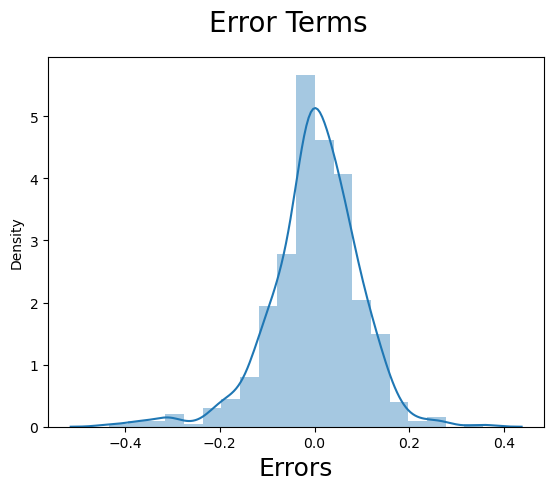

In [244]:
# Plot the histogram of the error terms
res=y_train - y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms are also normally distributed

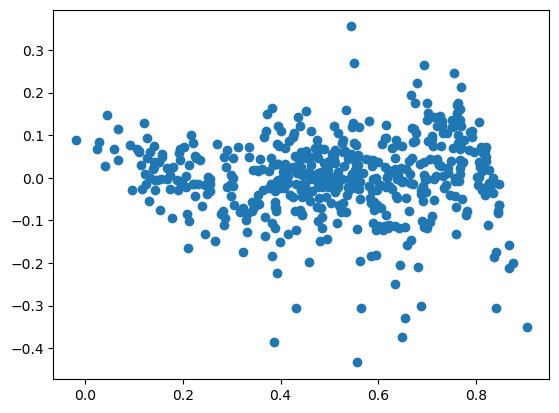

In [246]:
#Residual vs Predicted values pattern
plt.scatter(y_train_pred,res)
plt.show()

## Making Predictions

#### Applying the scaling on the test sets

In [250]:
X_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'season_spring',
       'season_winter', 'weekday_Saturday',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [251]:
X_train_rfe.head()

,yr,workingday,atemp,windspeed,season_spring,season_winter,weekday_Saturday,"weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,1,1,0.501133,0.300794,0,1,0,0,0
576,1,1,0.766351,0.264686,0,0,0,0,0
426,1,0,0.438975,0.255342,1,0,1,0,1
728,1,0,0.200348,0.663106,1,0,0,0,0
482,1,0,0.391735,0.188475,0,0,1,0,1


In [252]:
num_vars = ['mnth','atemp', 'hum', 'windspeed', 'cnt']

bike_test[num_vars] = scaler.transform(bike_test[num_vars])

#### Dividing into X_test and y_test

In [254]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [255]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [256]:
# Making predictions
y_test_pred = mlr_rfe.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

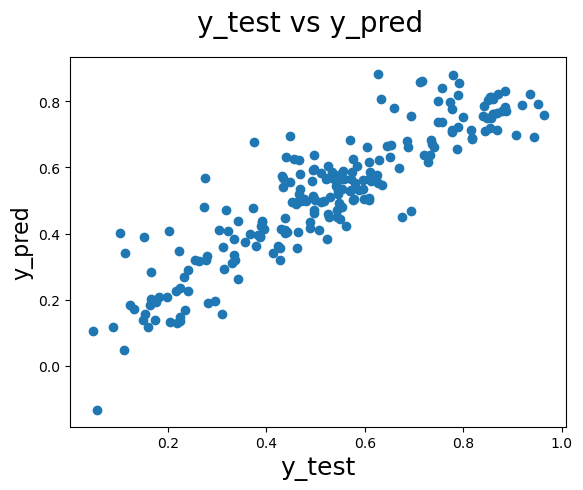

In [259]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Observations:

Linear Trend: The points exhibit a clear linear trend, indicating that the model is effectively capturing the relationship between the features and the target variable.

Prediction Accuracy: Many points are close to the diagonal line (y = x), reflecting the model's strong prediction accuracy.

Residual Spread: The residuals are evenly distributed around the diagonal, suggesting a consistent error rate across different values of y_test.

Outliers: While most points align well with the diagonal, the plot predominantly showcases good model performance with only a few exceptions.

Model Fit: The tight clustering of points around the diagonal demonstrates that the model's predictions align closely with the actual values.


#### Evaluate r2_score


In [263]:
from sklearn.metrics import r2_score
r2_test=r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_test)

0.8027994581190243


## Observations:
##### Train Set r2=0.824: The model explains 82.4% of the variance in the training data.
##### Test Set r2=0.802:  The model explains 80.2% of the variance in the unseen test data.

## Conclusion:
The close r2 values for train and test datasets suggest this model performs consistently and generalizes well to new data.
And also Adjusted R-squared value of 0.821 means the MLR model explains 82.1% of the target variable's variability after considering the predictors. This indicates strong model performance